In [7]:
!pip install kymatio captum

In [8]:
# Import libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Subset, Dataset, random_split
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from kymatio.torch import Scattering2D
from captum.attr import IntegratedGradients
import os
import zipfile
from PIL import Image
import time
import seaborn as sns

In [9]:
from google.colab import drive
drive.mount('/content/drive')
!ls /content/drive/MyDrive/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 1630610905588.mp4
 1630610905617.mp4
 1630610905685.mp4
 19239604_103351753615067_673834937_n.jpg
 20241015110302402-2300915.pdf
'AHMAD_nomination letter.pdf'
 archive.zip
'August in Dhq'
'Carta identità elettronica.pdf'
 carta.pdf
'Colab Notebooks'
'contract 2025.pdf'
'Contratto di Affitto Primo.pdf'
'Course Code.docx'
'DIPLOMA VTI.pdf'
'ENG Proficiency.pdf'
'isee parificato 2025 lista doc ti completa.pdf'
'More pics '
'My Pics'
'New Pics'
 Oppo
'oppo Retrica'
'Permesso di soggiorno.pdf'
 Pics
'saved pics'
'Tessera sanitaria .pdf'
'The Prophet Ebook by Kahlil Gibran_copy.pdf'
'Usama Ahmad CV 07-05-25.pdf'
'Whatsaap oop'
'WhatsApp Image 2025-02-22 at .jpg'


In [10]:
!find /content -name "archive.zip"

/content/drive/MyDrive/archive.zip


In [11]:
# Install dependencies
!pip install kymatio torch torchvision scikit-learn matplotlib seaborn captum

# Import libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Subset, Dataset, random_split
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from kymatio.torch import Scattering2D
from captum.attr import IntegratedGradients
import os
import zipfile
from PIL import Image
import time
import seaborn as sns

# Set device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Verify archive.zip exists
dataset_path = '/content/archive.zip'
print("Checking for archive.zip...")
if os.path.exists(dataset_path):
    print(f"Found archive.zip at {dataset_path}")
else:
    print(f"ERROR: archive.zip not found at {dataset_path}")
    print("Please upload archive.zip to /content/ using the Colab file explorer (left sidebar > upload button).")
    print("Or, if it's on Google Drive, mount Drive and update dataset_path:")
    print("""
    from google.colab import drive
    drive.mount('/content/drive')
    dataset_path = '/content/drive/MyDrive/archive.zip'
    """)
    print("Current contents of /content/:")
    !ls -la /content/

Using device: cuda
Checking for archive.zip...
ERROR: archive.zip not found at /content/archive.zip
Please upload archive.zip to /content/ using the Colab file explorer (left sidebar > upload button).
Or, if it's on Google Drive, mount Drive and update dataset_path:

    from google.colab import drive
    drive.mount('/content/drive')
    dataset_path = '/content/drive/MyDrive/archive.zip'
    
Current contents of /content/:
total 20
drwxr-xr-x 1 root root 4096 Sep 26 12:45 .
drwxr-xr-x 1 root root 4096 Sep 26 12:40 ..
drwxr-xr-x 4 root root 4096 Sep 24 13:41 .config
drwx------ 5 root root 4096 Sep 26 12:45 drive
drwxr-xr-x 1 root root 4096 Sep 24 13:41 sample_data


In [12]:
from google.colab import drive
drive.mount('/content/drive')
dataset_path = '/content/drive/MyDrive/archive.zip'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
# Install dependencies
!pip install kymatio torch torchvision scikit-learn matplotlib seaborn captum

# Import libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Subset, Dataset, random_split
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from kymatio.torch import Scattering2D
from captum.attr import IntegratedGradients
import os
import zipfile
from PIL import Image
import time
import seaborn as sns

# Set device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Verify archive.zip exists
dataset_path = '/content/archive.zip'
print("Checking for archive.zip...")
if os.path.exists(dataset_path):
    print(f"Found archive.zip at {dataset_path}")
else:
    print(f"ERROR: archive.zip not found at {dataset_path}")
    print("Please upload archive.zip to /content/ using the Colab file explorer (left sidebar > upload button).")
    print("Or, if it's on Google Drive, mount Drive and update dataset_path:")
    print("""
    from google.colab import drive
    drive.mount('/content/drive')
    dataset_path = '/content/drive/MyDrive/archive.zip'
    """)
    print("Current contents of /content/:")
    !ls -la /content/

Using device: cuda
Checking for archive.zip...
ERROR: archive.zip not found at /content/archive.zip
Please upload archive.zip to /content/ using the Colab file explorer (left sidebar > upload button).
Or, if it's on Google Drive, mount Drive and update dataset_path:

    from google.colab import drive
    drive.mount('/content/drive')
    dataset_path = '/content/drive/MyDrive/archive.zip'
    
Current contents of /content/:
total 20
drwxr-xr-x 1 root root 4096 Sep 26 12:45 .
drwxr-xr-x 1 root root 4096 Sep 26 12:40 ..
drwxr-xr-x 4 root root 4096 Sep 24 13:41 .config
drwx------ 5 root root 4096 Sep 26 12:45 drive
drwxr-xr-x 1 root root 4096 Sep 24 13:41 sample_data


In [14]:
from google.colab import drive
drive.mount('/content/drive')
dataset_path = '/content/drive/MyDrive/archive.zip'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
# Import os
import os
import zipfile

# Define paths
dataset_path = '/content/drive/MyDrive/archive.zip'
extract_path = '/content/dataset'

# Remove previous extraction if exists
if os.path.exists(extract_path):
    os.system(f'rm -rf {extract_path}')

# Create extraction directory
os.makedirs(extract_path, exist_ok=True)

# Extract the dataset
try:
    with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print(f"Dataset extracted to: {extract_path}")
    print(f"Extracted contents: {os.listdir(extract_path)}")
except Exception as e:
    print(f"ERROR: Failed to extract {dataset_path}. {e}")
    print("Ensure archive.zip is not corrupted. Try re-uploading or downloading a fresh copy.")
    raise

# Find data directory with class folders
data_path = None
for root, dirs, files in os.walk(extract_path):
    for d in dirs:
        if d in ['Adenocarcinoma', 'Benign']:
            data_path = root
            break
    if data_path:
        break

if not data_path:
    data_path = extract_path
    print("Warning: Using root extract path as dataset folder")
    print("Directory structure:")
    for root, dirs, files in os.walk(extract_path):
        level = root.replace(extract_path, '').count(os.sep)
        indent = ' ' * 4 * level
        print(f"{indent}{os.path.basename(root)}/")
        subindent = ' ' * 4 * (level + 1)
        for f in files[:5]:
            print(f"{subindent}{f}")
        if len(files) > 5:
            print(f"{subindent}... and {len(files)-5} more files")
        for d in dirs[:5]:
            print(f"{subindent}{d}/")
        if len(dirs) > 5:
            print(f"{subindent}... and {len(dirs)-5} more directories")


print(f"Using data path: {data_path}")

Dataset extracted to: /content/dataset
Extracted contents: ['adenocarcinoma', 'benign']
Directory structure:
dataset/
    adenocarcinoma/
    benign/
    adenocarcinoma/
        1774.jpg
        2600.jpg
        0537.jpg
        0168.jpg
        3585.jpg
        ... and 4995 more files
    benign/
        1774.jpg
        2600.jpg
        0537.jpg
        0168.jpg
        3585.jpg
        ... and 4995 more files
Using data path: /content/dataset


In [16]:
# Define the custom dataset class
class LungCancerDataset(Dataset):
    def __init__(self, data_dir, transform=None, classes=None):
        self.data_dir = data_dir
        self.transform = transform
        self.classes = classes if classes is not None else os.listdir(data_dir)
        self.image_paths = []
        self.labels = []
        self.class_to_idx = {cls_name: i for i, cls_name in enumerate(self.classes)}

        for class_name in self.classes:
            class_dir = os.path.join(self.data_dir, class_name)
            if not os.path.isdir(class_dir):
                print(f"Warning: Directory not found for class: {class_name}")
                continue
            for img_name in os.listdir(class_dir):
                img_path = os.path.join(class_dir, img_name)
                if os.path.isfile(img_path):
                    self.image_paths.append(img_path)
                    self.labels.append(self.class_to_idx[class_name])

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        label = self.labels[idx]
        image = Image.open(img_path).convert('RGB')

        if self.transform:
            image = self.transform(image)

        return image, label

# Define transformations
data_transforms = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Define class names
class_names = ['adenocarcinoma', 'benign']

# Instantiate the dataset
lung_dataset = LungCancerDataset(data_path, transform=data_transforms, classes=class_names)

print(f"Number of images in the dataset: {len(lung_dataset)}")
print(f"Class to index mapping: {lung_dataset.class_to_idx}")

Number of images in the dataset: 10000
Class to index mapping: {'adenocarcinoma': 0, 'benign': 1}


## Split data

### Subtask:
Split the dataset into training and testing sets.


**Reasoning**:
Split the dataset into training and testing sets using `random_split` and print the sizes of the resulting sets.



In [17]:
# Define the proportion for the test set
test_split_ratio = 0.2

# Calculate the number of images for training and testing
dataset_size = len(lung_dataset)
test_size = int(test_split_ratio * dataset_size)
train_size = dataset_size - test_size

# Split the dataset into training and testing sets
train_dataset, test_dataset = random_split(lung_dataset, [train_size, test_size])

# Print the number of images in each set
print(f"Number of images in the training set: {len(train_dataset)}")
print(f"Number of images in the testing set: {len(test_dataset)}")

Number of images in the training set: 8000
Number of images in the testing set: 2000


In [18]:
# Define the CNN architecture
class CNN(nn.Module):
    def __init__(self, num_classes=2):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 32 * 32, 128) # Calculate the flattened size
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 64 * 32 * 32) # Flatten the tensor
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Instantiate the CNN model
model = CNN(num_classes=len(class_names)).to(device)

# Print the model architecture
print(model)

CNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu): ReLU()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=65536, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=2, bias=True)
)


## Visualize Results

### Subtask:
Visualize the performance metrics (accuracy and F1 score) from the k-fold cross-validation and test set evaluation for both CNN and ScatNet. Visualize the filters from both models.

**Reasoning**:
Generate visualizations to compare the performance of the CNN and ScatNet models and visualize the learned filters from each model to gain insights into their feature extraction capabilities.

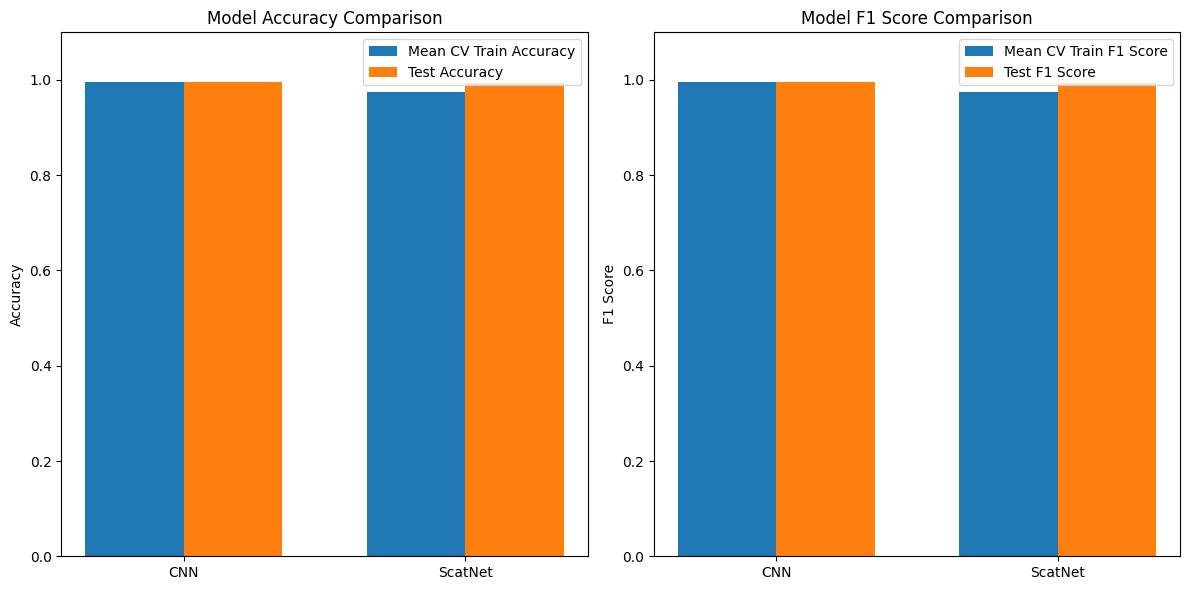

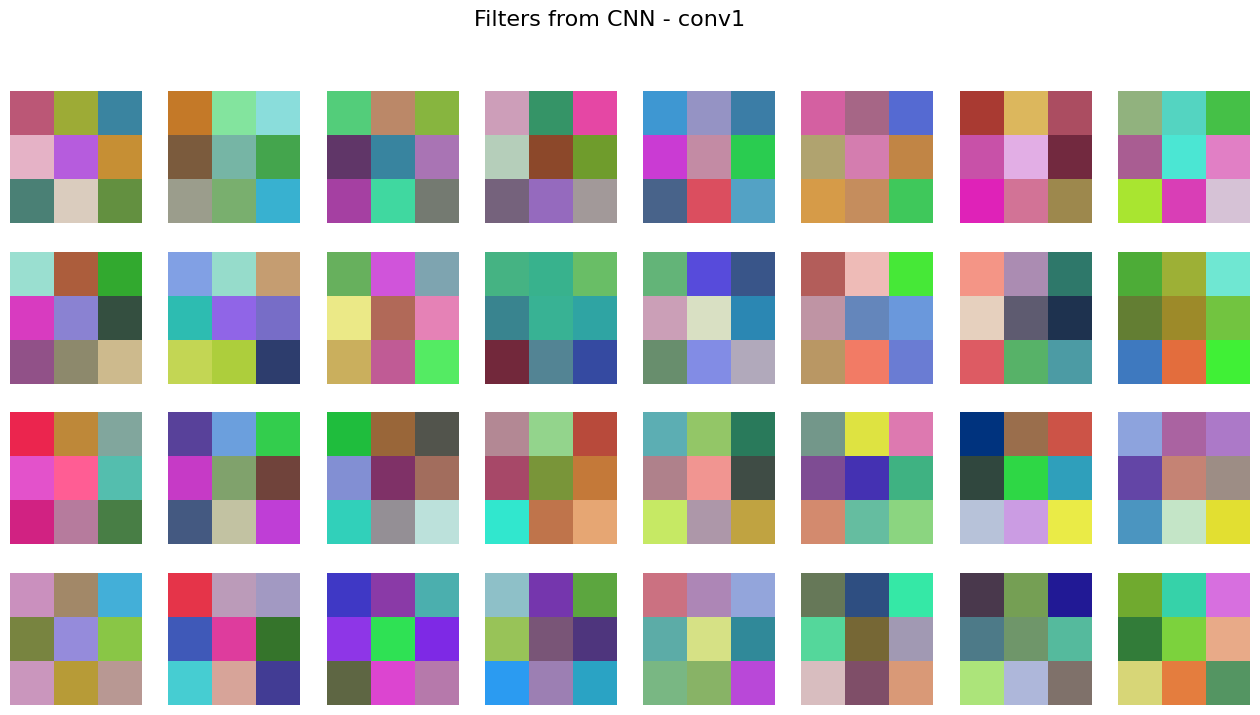

In [23]:
# --- Visualize Performance Metrics ---

# Prepare data for plotting
models = ['CNN', 'ScatNet']
mean_train_accuracies = [mean_accuracy, mean_scatnet_accuracy]
mean_train_f1_scores = [mean_f1_score, mean_scatnet_f1_score]
test_accuracies = [cnn_test_accuracy, scatnet_test_accuracy]
test_f1_scores = [cnn_test_f1_score, scatnet_test_f1_score]

x = np.arange(len(models)) # the label locations
width = 0.35 # the width of the bars

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot Accuracy
rects1 = ax[0].bar(x - width/2, mean_train_accuracies, width, label='Mean CV Train Accuracy')
rects2 = ax[0].bar(x + width/2, test_accuracies, width, label='Test Accuracy')

# Add some text for labels, titles and custom x-axis tick labels, etc.
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Model Accuracy Comparison')
ax[0].set_xticks(x)
ax[0].set_xticklabels(models)
ax[0].legend()
ax[0].set_ylim([0, 1.1]) # Set y-axis limit for better comparison

# Plot F1 Score
rects3 = ax[1].bar(x - width/2, mean_train_f1_scores, width, label='Mean CV Train F1 Score')
rects4 = ax[1].bar(x + width/2, test_f1_scores, width, label='Test F1 Score')

# Add some text for labels, titles and custom x-axis tick labels, etc.
ax[1].set_ylabel('F1 Score')
ax[1].set_title('Model F1 Score Comparison')
ax[1].set_xticks(x)
ax[1].set_xticklabels(models)
ax[1].legend()
ax[1].set_ylim([0, 1.1]) # Set y-axis limit for better comparison

plt.tight_layout()
plt.show()

# --- Visualize Filters ---

# Function to visualize filters
def visualize_filters(model, layer_name, num_filters=8):
    """Visualizes the filters of a specified convolutional layer."""
    if not hasattr(model, layer_name):
        print(f"Layer '{layer_name}' not found in the model.")
        return

    layer = getattr(model, layer_name)

    if not isinstance(layer, nn.Conv2d):
        print(f"Layer '{layer_name}' is not a convolutional layer.")
        return

    # Get the weights
    filters = layer.weight.data.cpu().numpy()

    # Normalize filter values for visualization
    filters = (filters - filters.min()) / (filters.max() - filters.min())

    # Plot filters
    num_cols = 8
    num_rows = (num_filters + num_cols - 1) // num_cols
    plt.figure(figsize=(num_cols * 2, num_rows * 2))
    plt.suptitle(f"Filters from {type(model).__name__} - {layer_name}", fontsize=16)

    for i in range(min(num_filters, filters.shape[0])):
        plt.subplot(num_rows, num_cols, i + 1)
        # Assuming filters are grayscale or have 3 channels (RGB)
        if filters.shape[1] == 1:
             plt.imshow(filters[i, 0, :, :], cmap='gray')
        else:
             # If it's an RGB filter, transpose to (height, width, channels)
             plt.imshow(filters[i].transpose((1, 2, 0)))
        plt.axis('off')
    plt.show()

# Visualize filters for the first convolutional layer of CNN
visualize_filters(cnn_model, 'conv1', num_filters=32)

# Note: ScatNet does not have traditional convolutional filters in the same way as CNN.
# The scattering transform uses predefined wavelet filters. We can visualize these if needed,
# but it's different from visualizing learned CNN filters.
# For now, we'll just visualize CNN filters as they are the learned parameters.

# If you want to visualize the fixed scattering filters from kymatio,
# you would access them through the scattering object, e.g., scatnet_model_test.scattering.psi()
# However, visualizing all of them might be extensive.

## Visualize K-Fold Training and Validation Metrics

### Subtask:
Visualize the epoch-wise training and validation loss and accuracy for each fold of the k-fold cross-validation for both CNN and ScatNet.

**Reasoning**:
Generate plots to visualize the training progress within each fold, showing how loss and accuracy change over epochs for both models.

--- Visualizing CNN K-Fold Training and Validation Metrics ---


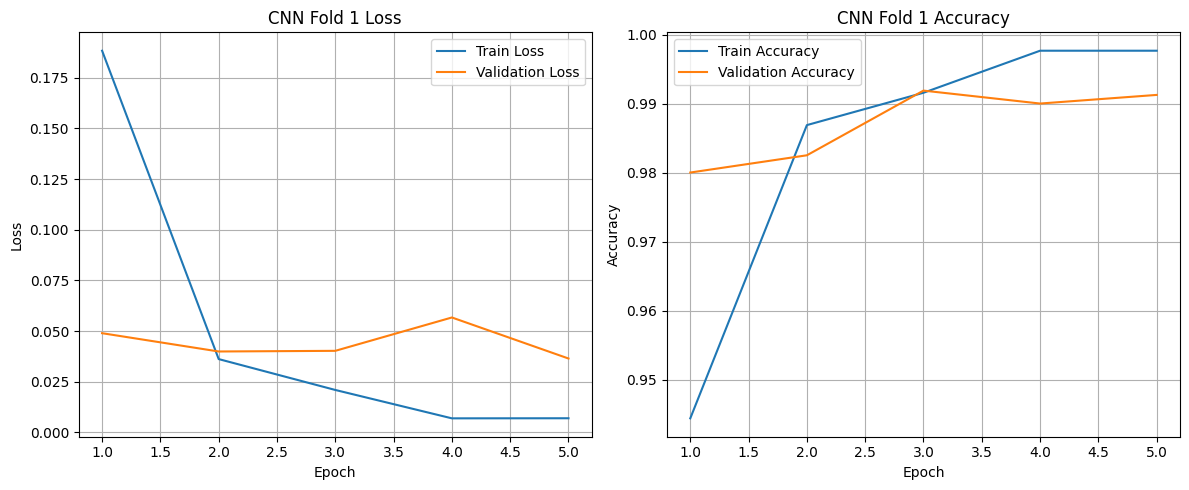

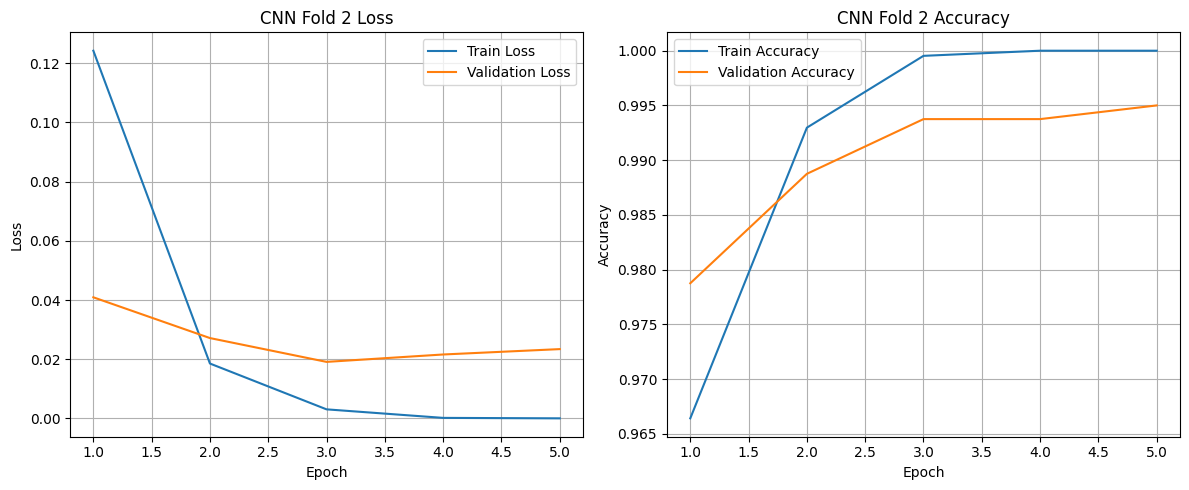

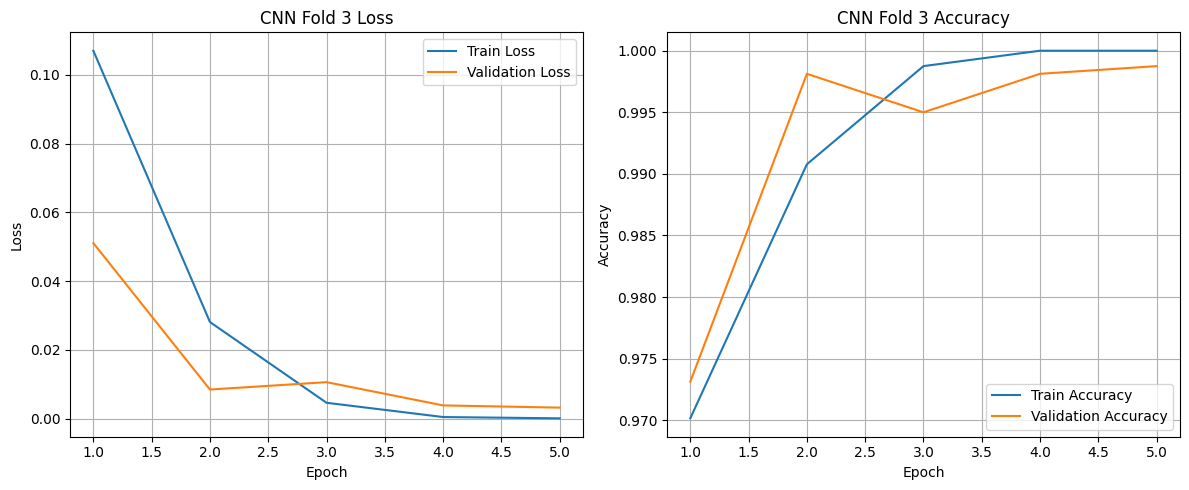


--- Visualizing ScatNet K-Fold Training and Validation Metrics ---


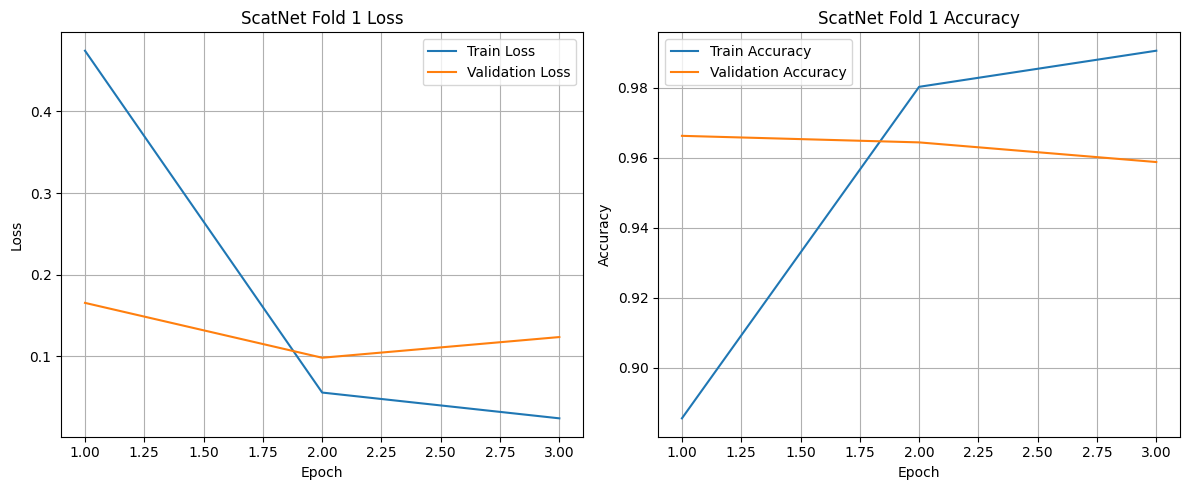

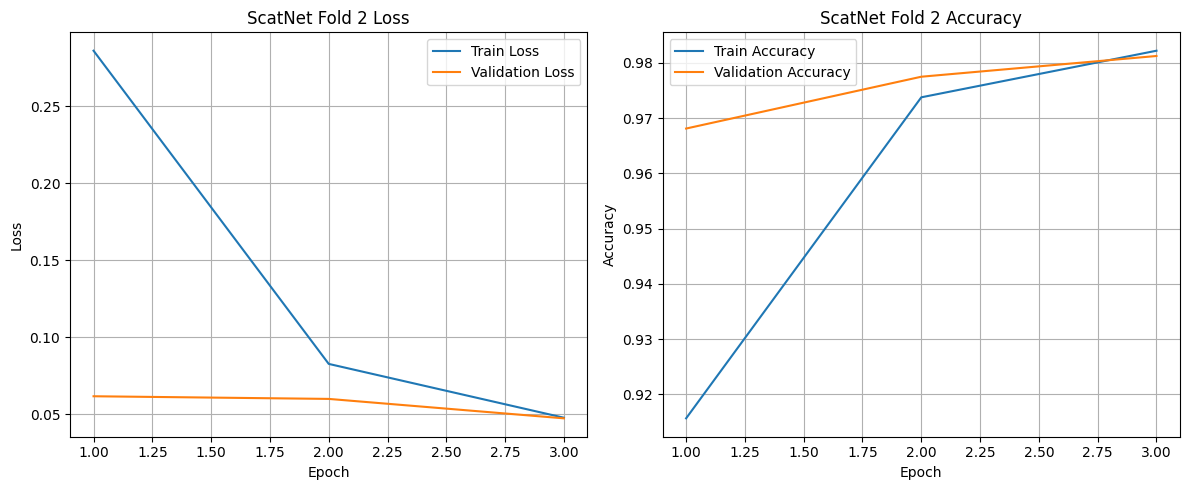

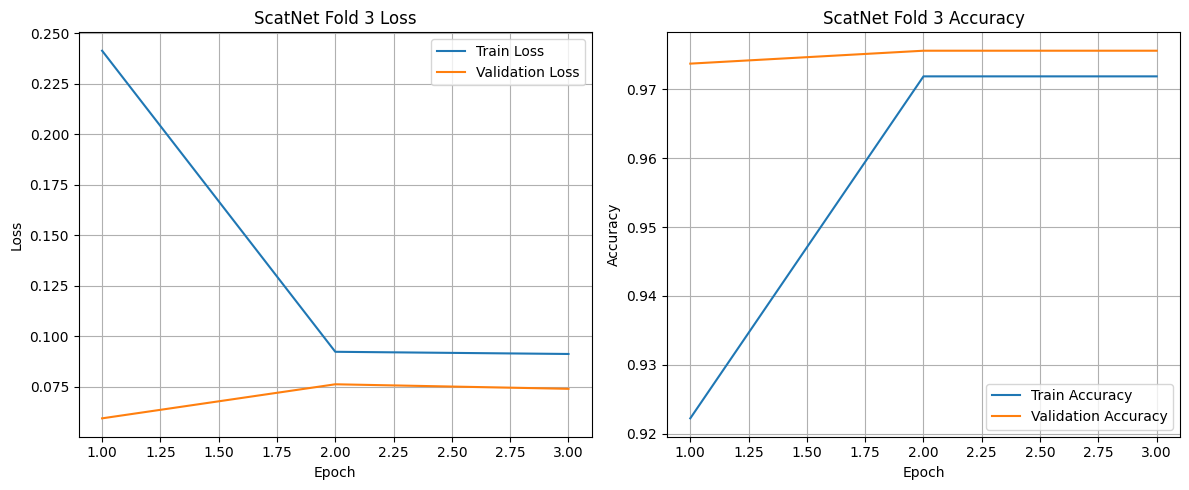

In [27]:
# --- Visualize CNN K-Fold Metrics ---
print("--- Visualizing CNN K-Fold Training and Validation Metrics ---")

num_epochs = len(cnn_fold_train_losses[0]) # Assuming all folds have the same number of epochs
epochs = range(1, num_epochs + 1)

for fold in range(n_splits):
    plt.figure(figsize=(12, 5))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, cnn_fold_train_losses[fold], label='Train Loss')
    plt.plot(epochs, cnn_fold_val_losses[fold], label='Validation Loss')
    plt.title(f'CNN Fold {fold+1} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, cnn_fold_train_accuracies_epoch[fold], label='Train Accuracy')
    plt.plot(epochs, cnn_fold_val_accuracies_epoch[fold], label='Validation Accuracy')
    plt.title(f'CNN Fold {fold+1} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# --- Visualize ScatNet K-Fold Metrics ---
print("\n--- Visualizing ScatNet K-Fold Training and Validation Metrics ---")

num_epochs_scatnet = len(scatnet_fold_train_losses[0]) # Assuming all folds have the same number of epochs
epochs_scatnet = range(1, num_epochs_scatnet + 1)


for fold in range(n_splits):
    plt.figure(figsize=(12, 5))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs_scatnet, scatnet_fold_train_losses[fold], label='Train Loss')
    plt.plot(epochs_scatnet, scatnet_fold_val_losses[fold], label='Validation Loss')
    plt.title(f'ScatNet Fold {fold+1} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)


    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs_scatnet, scatnet_fold_train_accuracies_epoch[fold], label='Train Accuracy')
    plt.plot(epochs_scatnet, scatnet_fold_val_accuracies_epoch[fold], label='Validation Accuracy')
    plt.title(f'ScatNet Fold {fold+1} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)


    plt.tight_layout()
    plt.show()

## Implement scatnet

### Subtask:
Implement the Scattering Network using `kymatio` and the same classifier as the CNN.


**Reasoning**:
Implement the ScatNet model using kymatio and the same classifier as the CNN.



In [19]:
# Define the ScatNet architecture
class ScatNet(nn.Module):
    """
    Scattering Network (ScatNet) model using kymatio.

    This model applies a scattering transform to the input images and then
    uses a fully connected classifier similar to the CNN model.
    """
    def __init__(self, num_classes=2, J=2, shape=(128, 128)):
        """
        Initializes the ScatNet model.

        Args:
            num_classes (int): The number of output classes.
            J (int): The maximum scale of the scattering transform.
            shape (tuple): The input image shape (height, width).
        """
        super(ScatNet, self).__init__()
        # Initialize the Scattering2D transform
        self.scattering = Scattering2D(J=J, shape=shape)

        # Calculate the input size for the linear layer based on scattering output
        # The output shape of Scattering2D for a grayscale image of shape (H, W) with J scales is (1, 1 + J*8 + J*(J-1)*8/2, H/2**J, W/2**J)
        # For RGB, it will be 3 times this size along the feature dimension.
        # Scattering2D expects (N, C, H, W) and applies scattering to each channel independently.
        # So the output shape will be (N, C * (1 + J*8 + J*(J-1)*8/2), H/2**J, W/2**J)
        # We need to flatten this.

        # Get a dummy input to calculate the output shape of the scattering layer
        dummy_input = torch.randn(1, 3, shape[0], shape[1])
        with torch.no_grad():
            dummy_output = self.scattering(dummy_input)
            flattened_size = dummy_output.view(dummy_output.size(0), -1).size(1)


        # Define the fully connected layers (classifier)
        self.fc1 = nn.Linear(flattened_size, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        """
        Defines the forward pass of the model.

        Args:
            x (torch.Tensor): The input tensor.

        Returns:
            torch.Tensor: The output tensor.
        """
        # Apply scattering transform
        # Scattering2D expects input of shape (N, C, H, W)
        x = self.scattering(x)
        # Flatten the output
        x = x.view(x.size(0), -1)
        # Pass through the classifier layers
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Instantiate the ScatNet model
scatnet_model = ScatNet(num_classes=len(class_names), J=2, shape=(128, 128)).to(device)

# Print the model architecture
print(scatnet_model)

ScatNet(
  (scattering): Scattering2D()
  (fc1): Linear(in_features=248832, out_features=128, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=128, out_features=2, bias=True)
)


## K-fold cross-validation for cnn

### Subtask:
Set up and perform k-fold cross-validation for the CNN, calculate and store the mean accuracy and F1 score on the training sets across all folds.


**Reasoning**:
Set up k-fold cross-validation and iterate through the folds to train and evaluate the CNN model, storing the results.



In [25]:
# Define the number of folds
n_splits = 5

# Initialize lists to store accuracy and F1 score for each fold
cnn_train_accuracies = []
cnn_train_f1_scores = []

# Initialize lists to store epoch-wise loss and accuracy for plotting
cnn_fold_train_losses = []
cnn_fold_val_losses = []
cnn_fold_train_accuracies_epoch = []
cnn_fold_val_accuracies_epoch = []


# Set up KFold
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Convert the Subset objects to a list of indices
all_indices = list(range(len(train_dataset)))

# Iterate through each fold
for fold, (train_indices, val_indices) in enumerate(kfold.split(all_indices)):
    print(f"--- Fold {fold+1}/{n_splits} ---")

    # Create data loaders for the current fold
    train_subset = Subset(train_dataset, train_indices)
    val_subset = Subset(train_dataset, val_indices)

    train_loader = DataLoader(train_subset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_subset, batch_size=32, shuffle=False)

    # Instantiate a new CNN model for each fold
    model = CNN(num_classes=len(class_names)).to(device)

    # Define loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Lists to store metrics for the current fold
    fold_train_losses = []
    fold_val_losses = []
    fold_train_accuracies_epoch = []
    fold_val_accuracies_epoch = []


    # Train the CNN model for a fixed number of epochs
    num_epochs = 5
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()


        epoch_loss = running_loss / len(train_subset)
        epoch_accuracy = correct_train / total_train
        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_loss:.4f}, Train Acc: {epoch_accuracy:.4f}")

        fold_train_losses.append(epoch_loss)
        fold_train_accuracies_epoch.append(epoch_accuracy)


        # Evaluate on validation set for this epoch
        model.eval()
        running_val_loss = 0.0
        correct_val = 0
        total_val = 0
        all_labels = []
        all_predictions = []
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)

                running_val_loss += loss.item() * images.size(0)

                _, predicted = torch.max(outputs.data, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()

                all_labels.extend(labels.cpu().numpy())
                all_predictions.extend(predicted.cpu().numpy())


        epoch_val_loss = running_val_loss / len(val_subset)
        epoch_val_accuracy = correct_val / total_val
        print(f"Epoch [{epoch+1}/{num_epochs}], Val Loss: {epoch_val_loss:.4f}, Val Acc: {epoch_val_accuracy:.4f}")
        fold_val_losses.append(epoch_val_loss)
        fold_val_accuracies_epoch.append(epoch_val_accuracy)


    # Calculate final accuracy and F1 score for the fold (using the last epoch's predictions)
    accuracy = accuracy_score(all_labels, all_predictions)
    f1 = f1_score(all_labels, all_predictions, average='weighted')


    print(f"Fold {fold+1} Final Validation Accuracy: {accuracy:.4f}")
    print(f"Fold {fold+1} Final Validation F1 Score: {f1:.4f}")

    # Append results to lists
    cnn_train_accuracies.append(accuracy)
    cnn_train_f1_scores.append(f1)
    cnn_fold_train_losses.append(fold_train_losses)
    cnn_fold_val_losses.append(fold_val_losses)
    cnn_fold_train_accuracies_epoch.append(fold_train_accuracies_epoch)
    cnn_fold_val_accuracies_epoch.append(fold_val_accuracies_epoch)


# Calculate and print mean accuracy and F1 score
mean_accuracy = np.mean(cnn_train_accuracies)
mean_f1_score = np.mean(cnn_train_f1_scores)

print("\n--- K-Fold Cross-Validation Results (CNN) ---")
print(f"Mean Final Validation Accuracy: {mean_accuracy:.4f}")
print(f"Mean Final Validation F1 Score: {mean_f1_score:.4f}")

--- Fold 1/5 ---
Epoch [1/5], Train Loss: 0.1884, Train Acc: 0.9444
Epoch [1/5], Val Loss: 0.0490, Val Acc: 0.9800
Epoch [2/5], Train Loss: 0.0362, Train Acc: 0.9869
Epoch [2/5], Val Loss: 0.0399, Val Acc: 0.9825
Epoch [3/5], Train Loss: 0.0209, Train Acc: 0.9916
Epoch [3/5], Val Loss: 0.0403, Val Acc: 0.9919
Epoch [4/5], Train Loss: 0.0069, Train Acc: 0.9977
Epoch [4/5], Val Loss: 0.0567, Val Acc: 0.9900
Epoch [5/5], Train Loss: 0.0070, Train Acc: 0.9977
Epoch [5/5], Val Loss: 0.0365, Val Acc: 0.9912
Fold 1 Final Validation Accuracy: 0.9912
Fold 1 Final Validation F1 Score: 0.9912
--- Fold 2/5 ---
Epoch [1/5], Train Loss: 0.1242, Train Acc: 0.9664
Epoch [1/5], Val Loss: 0.0409, Val Acc: 0.9788
Epoch [2/5], Train Loss: 0.0185, Train Acc: 0.9930
Epoch [2/5], Val Loss: 0.0271, Val Acc: 0.9888
Epoch [3/5], Train Loss: 0.0031, Train Acc: 0.9995
Epoch [3/5], Val Loss: 0.0191, Val Acc: 0.9938
Epoch [4/5], Train Loss: 0.0002, Train Acc: 1.0000
Epoch [4/5], Val Loss: 0.0216, Val Acc: 0.9938
Ep

In [26]:
# Define the number of folds
n_splits = 3

# Define the number of epochs for training in each fold
num_epochs = 3

# Define the size of the subset of the training data to use for cross-validation
# For example, use 20% of the training data for faster execution
subset_size = int(0.2 * len(train_dataset))
subset_indices = list(range(subset_size))
cv_train_dataset = Subset(train_dataset, subset_indices)


# Initialize lists to store accuracy and F1 score for each fold
scatnet_train_accuracies = []
scatnet_train_f1_scores = []

# Initialize lists to store epoch-wise loss and accuracy for plotting
scatnet_fold_train_losses = []
scatnet_fold_val_losses = []
scatnet_fold_train_accuracies_epoch = []
scatnet_fold_val_accuracies_epoch = []


# Set up KFold
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Convert the Subset objects to a list of indices
all_indices_cv = list(range(len(cv_train_dataset)))

# Iterate through each fold using the subset of the training data
for fold, (train_indices, val_indices) in enumerate(kfold.split(all_indices_cv)):
    print(f"--- Fold {fold+1}/{n_splits} ---")

    # Create data loaders for the current fold from the cross-validation subset
    train_subset = Subset(cv_train_dataset, train_indices)
    val_subset = Subset(cv_train_dataset, val_indices)

    train_loader = DataLoader(train_subset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_subset, batch_size=32, shuffle=False)

    # Instantiate a new ScatNet model for each fold
    # Ensure the shape and J parameters match the ScatNet definition
    model = ScatNet(num_classes=len(class_names), J=2, shape=(128, 128)).to(device)


    # Define loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Lists to store metrics for the current fold
    fold_train_losses = []
    fold_val_losses = []
    fold_train_accuracies_epoch = []
    fold_val_accuracies_epoch = []


    # Train the ScatNet model for the specified number of epochs
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()


        epoch_loss = running_loss / len(train_subset)
        epoch_accuracy = correct_train / total_train
        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_loss:.4f}, Train Acc: {epoch_accuracy:.4f}")

        fold_train_losses.append(epoch_loss)
        fold_train_accuracies_epoch.append(epoch_accuracy)

        # Evaluate on validation set for this epoch
        model.eval()
        running_val_loss = 0.0
        correct_val = 0
        total_val = 0
        all_labels = []
        all_predictions = []
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)

                running_val_loss += loss.item() * images.size(0)

                _, predicted = torch.max(outputs.data, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()

                all_labels.extend(labels.cpu().numpy())
                all_predictions.extend(predicted.cpu().numpy())


        epoch_val_loss = running_val_loss / len(val_subset)
        epoch_val_accuracy = correct_val / total_val
        print(f"Epoch [{epoch+1}/{num_epochs}], Val Loss: {epoch_val_loss:.4f}, Val Acc: {epoch_val_accuracy:.4f}")
        fold_val_losses.append(epoch_val_loss)
        fold_val_accuracies_epoch.append(epoch_val_accuracy)


    # Calculate final accuracy and F1 score for the fold (using the last epoch's predictions)
    accuracy = accuracy_score(all_labels, all_predictions)
    f1 = f1_score(all_labels, all_predictions, average='weighted')


    print(f"Fold {fold+1} Final Validation Accuracy: {accuracy:.4f}")
    print(f"Fold {fold+1} Final Validation F1 Score: {f1:.4f}")


    # Append results to lists
    scatnet_train_accuracies.append(accuracy)
    scatnet_train_f1_scores.append(f1)
    scatnet_fold_train_losses.append(fold_train_losses)
    scatnet_fold_val_losses.append(fold_val_losses)
    scatnet_fold_train_accuracies_epoch.append(fold_train_accuracies_epoch)
    scatnet_fold_val_accuracies_epoch.append(fold_val_accuracies_epoch)


# Calculate and print mean accuracy and F1 score
mean_scatnet_accuracy = np.mean(scatnet_train_accuracies)
mean_scatnet_f1_score = np.mean(scatnet_train_f1_scores)

print("\n--- K-Fold Cross-Validation Results (ScatNet) ---")
print(f"Mean Final Validation Accuracy: {mean_scatnet_accuracy:.4f}")
print(f"Mean Final Validation F1 Score: {mean_scatnet_f1_score:.4f}")

--- Fold 1/3 ---
Epoch [1/3], Train Loss: 0.4743, Train Acc: 0.8856
Epoch [1/3], Val Loss: 0.1654, Val Acc: 0.9663
Epoch [2/3], Train Loss: 0.0555, Train Acc: 0.9803
Epoch [2/3], Val Loss: 0.0982, Val Acc: 0.9644
Epoch [3/3], Train Loss: 0.0239, Train Acc: 0.9906
Epoch [3/3], Val Loss: 0.1235, Val Acc: 0.9588
Fold 1 Final Validation Accuracy: 0.9588
Fold 1 Final Validation F1 Score: 0.9588
--- Fold 2/3 ---
Epoch [1/3], Train Loss: 0.2860, Train Acc: 0.9157
Epoch [1/3], Val Loss: 0.0615, Val Acc: 0.9681
Epoch [2/3], Train Loss: 0.0826, Train Acc: 0.9738
Epoch [2/3], Val Loss: 0.0598, Val Acc: 0.9775
Epoch [3/3], Train Loss: 0.0476, Train Acc: 0.9822
Epoch [3/3], Val Loss: 0.0472, Val Acc: 0.9812
Fold 2 Final Validation Accuracy: 0.9812
Fold 2 Final Validation F1 Score: 0.9812
--- Fold 3/3 ---
Epoch [1/3], Train Loss: 0.2414, Train Acc: 0.9222
Epoch [1/3], Val Loss: 0.0593, Val Acc: 0.9737
Epoch [2/3], Train Loss: 0.0923, Train Acc: 0.9719
Epoch [2/3], Val Loss: 0.0762, Val Acc: 0.9756
E

## Confusion Matrices

### Subtask:
Generate and visualize confusion matrices for the CNN and ScatNet models on the test set.

**Reasoning**:
Visualize the confusion matrices to understand the performance of each model in terms of true positives, true negatives, false positives, and false negatives on the test set.

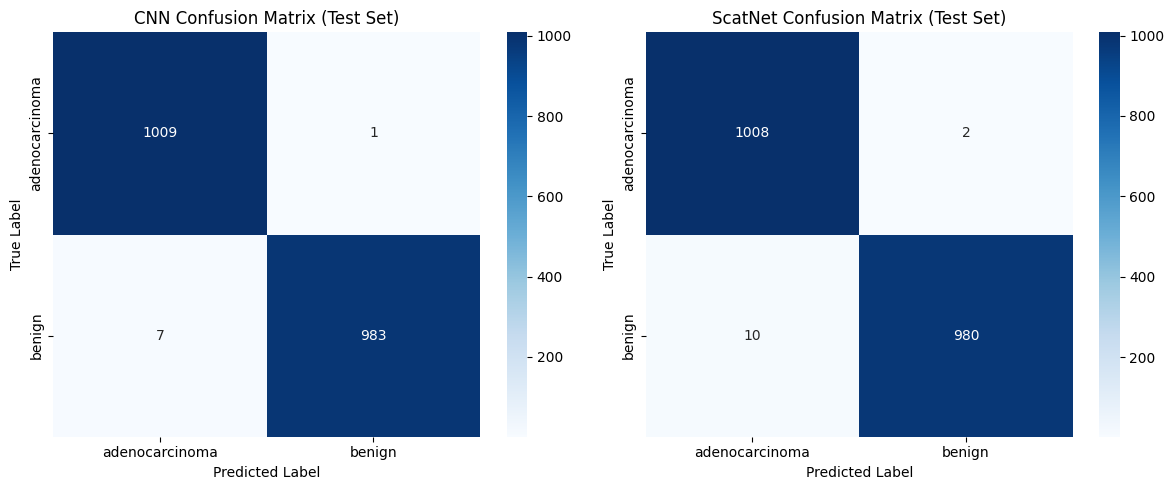

In [24]:
# --- Generate Confusion Matrices ---

# Confusion Matrix for CNN
cnn_cm = confusion_matrix(all_labels_cnn, all_predictions_cnn)

# Confusion Matrix for ScatNet
scatnet_cm = confusion_matrix(all_labels_scatnet, all_predictions_scatnet)

# --- Visualize Confusion Matrices ---

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot CNN Confusion Matrix
sns.heatmap(cnn_cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('CNN Confusion Matrix (Test Set)')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')
axes[0].set_xticklabels(class_names)
axes[0].set_yticklabels(class_names)

# Plot ScatNet Confusion Matrix
sns.heatmap(scatnet_cm, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('ScatNet Confusion Matrix (Test Set)')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')
axes[1].set_xticklabels(class_names)
axes[1].set_yticklabels(class_names)

plt.tight_layout()
plt.show()

In [22]:
# Create data loaders for the full training and test sets
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# --- Train and evaluate CNN on the test set ---
print("--- Training and Evaluating CNN ---")

# Instantiate a new CNN model
cnn_model = CNN(num_classes=len(class_names)).to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn_model.parameters(), lr=0.001)

# Train the CNN model
num_epochs = 10 # You can adjust the number of epochs
for epoch in range(num_epochs):
    cnn_model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = cnn_model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)

    epoch_loss = running_loss / len(train_dataset)
    print(f"CNN Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")

# Evaluate the trained CNN model on the test set
cnn_model.eval()
all_labels_cnn = []
all_predictions_cnn = []
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = cnn_model(images)
        _, predicted = torch.max(outputs.data, 1)

        all_labels_cnn.extend(labels.cpu().numpy())
        all_predictions_cnn.extend(predicted.cpu().numpy())

# Calculate accuracy and F1 score for CNN
cnn_test_accuracy = accuracy_score(all_labels_cnn, all_predictions_cnn)
cnn_test_f1_score = f1_score(all_labels_cnn, all_predictions_cnn, average='weighted')

print("\n--- CNN Test Set Results ---")
print(f"Test Accuracy: {cnn_test_accuracy:.4f}")
print(f"Test F1 Score: {cnn_test_f1_score:.4f}")


# --- Train and evaluate ScatNet on the test set ---
print("\n--- Training and Evaluating ScatNet ---")

# Instantiate a new ScatNet model
scatnet_model_test = ScatNet(num_classes=len(class_names), J=2, shape=(128, 128)).to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(scatnet_model_test.parameters(), lr=0.001)

# Train the ScatNet model
# You might want to use the same number of epochs as CNN or adjust based on performance
num_epochs = 10
for epoch in range(num_epochs):
    scatnet_model_test.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = scatnet_model_test(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)

    epoch_loss = running_loss / len(train_dataset)
    print(f"ScatNet Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")

# Evaluate the trained ScatNet model on the test set
scatnet_model_test.eval()
all_labels_scatnet = []
all_predictions_scatnet = []
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = scatnet_model_test(images)
        _, predicted = torch.max(outputs.data, 1)

        all_labels_scatnet.extend(labels.cpu().numpy())
        all_predictions_scatnet.extend(predicted.cpu().numpy())

# Calculate accuracy and F1 score for ScatNet
scatnet_test_accuracy = accuracy_score(all_labels_scatnet, all_predictions_scatnet)
scatnet_test_f1_score = f1_score(all_labels_scatnet, all_predictions_scatnet, average='weighted')

print("\n--- ScatNet Test Set Results ---")
print(f"Test Accuracy: {scatnet_test_accuracy:.4f}")
print(f"Test F1 Score: {scatnet_test_f1_score:.4f}")

--- Training and Evaluating CNN ---
CNN Epoch [1/10], Loss: 0.1092
CNN Epoch [2/10], Loss: 0.0278
CNN Epoch [3/10], Loss: 0.0055
CNN Epoch [4/10], Loss: 0.0008
CNN Epoch [5/10], Loss: 0.0001
CNN Epoch [6/10], Loss: 0.0000
CNN Epoch [7/10], Loss: 0.0000
CNN Epoch [8/10], Loss: 0.0000
CNN Epoch [9/10], Loss: 0.0000
CNN Epoch [10/10], Loss: 0.0000

--- CNN Test Set Results ---
Test Accuracy: 0.9960
Test F1 Score: 0.9960

--- Training and Evaluating ScatNet ---
ScatNet Epoch [1/10], Loss: 0.1351
ScatNet Epoch [2/10], Loss: 0.0455
ScatNet Epoch [3/10], Loss: 0.0347
ScatNet Epoch [4/10], Loss: 0.0160
ScatNet Epoch [5/10], Loss: 0.0069
ScatNet Epoch [6/10], Loss: 0.0088
ScatNet Epoch [7/10], Loss: 0.0311
ScatNet Epoch [8/10], Loss: 0.0134
ScatNet Epoch [9/10], Loss: 0.0126
ScatNet Epoch [10/10], Loss: 0.0025

--- ScatNet Test Set Results ---
Test Accuracy: 0.9940
Test F1 Score: 0.9940
